# Kaggle Bike Sharing Demand
[http://www.kaggle.com/c/bike-sharing-demand](http://www.kaggle.com/c/bike-sharing-demand)

- Bike_Sharing_Demand.csv (10,886 * 12)
   - <font color = 'blue'>datetime : Date + Timestamp</font>
   - season : 1(봄), 2(여름), 3(가을), 4(겨울)
   - holiday : 0(휴일이 아닌 날), 1(토요일, 일요일을 제외한 공휴일)
   - workingday : 0(주말 및 휴일), 1(토요일, 일요일 및 휴일이 아닌 주중)
   - weather : 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/ 번개)
   - temp : 온도(섭씨)
   - atemp : 체감온도(섭씨)
   - humidity : 습도
   - windspeed : 풍속
   - casual : 사전 등록되지 않은 사용자 대여 횟수
   - registered : 사전 등록된 사용자 대여 횟수
   - <font color = 'red'>count : 총 대여 횟수 -> 'y'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. Data Load
* 'Bike_Sharing_Demand.csv' from Github

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Bike_Sharing_Demand.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
DF.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


# II. Data Preprocessing

> ## 1) 'object' -> 'datetime64'

In [ ]:
DF['datetime'] = pd.to_datetime(DF['datetime'])

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


> ## 2) 'year', 'month', 'day', 'hour', 'weekday' 추출

In [ ]:
DF['year'] = DF['datetime'].dt.year
DF['month'] = DF['datetime'].dt.month
DF['day'] = DF['datetime'].dt.day
DF['hour'] = DF['datetime'].dt.hour
DF['weekday'] = DF['datetime'].dt.weekday

In [ ]:
DF.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5


> ## 3) Drop Columns

- 'datetime'

In [ ]:
DF.drop(columns = 'datetime', axis = 1, inplace = True)

In [ ]:
DF.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5


> ## 4) 분석용 DataFrame 백업

In [ ]:
DF0 = DF.copy()

DF0.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5


> ## 5) 시각화 레이블 변환

In [ ]:
DF['season'] = DF['season'].map({1: 'Spring', 
                                 2: 'Summer', 
                                 3: 'Fall', 
                                 4: 'Winter'})

DF['weather'] = DF['weather'].map({1: 'Clear', 
                                   2: 'Mist, Few clouds', 
                                   3: 'Light Snow, Rain, Thunder', 
                                   4: 'Heavy Snow, Rain, Thunder'})

DF['holiday'] = DF['holiday'].map({0: 'WorkingDay', 
                                   1: 'Holiday'})

DF['workingday'] = DF['workingday'].map({0: 'Holiday', 
                                         1: 'WorkingDay'})

DF['weekday'] = DF['weekday'].map({0: 'Monday', 
                                   1: 'Tuesday', 
                                   2: 'Wednesday', 
                                   3: 'Thursday',
                                   4: 'Friday',
                                   5: 'Saturday',
                                   6: 'Sunday'})

In [ ]:
DF.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,Spring,WorkingDay,Holiday,Clear,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,Spring,WorkingDay,Holiday,Clear,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,Spring,WorkingDay,Holiday,Clear,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday


# III. 탐색적데이터분석(EDA)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> ## 1) 종합

* 막대 그래프

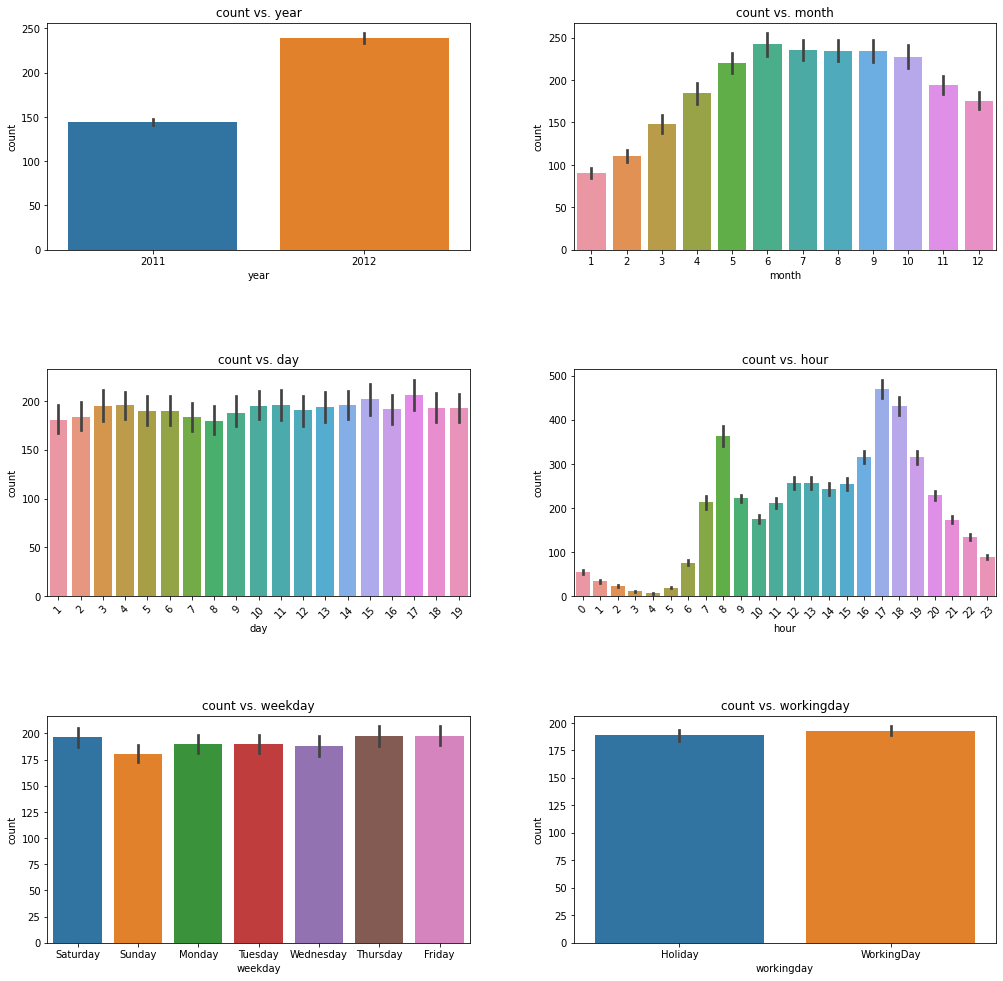

In [ ]:
figure, axes = plt.subplots(nrows = 3, ncols = 2)
plt.tight_layout()           
figure.set_size_inches(15, 15)

sns.barplot(x = 'year', y = 'count', data = DF, ax = axes[0, 0])
sns.barplot(x = 'month', y = 'count', data = DF, ax = axes[0, 1])
sns.barplot(x = 'day', y = 'count', data = DF, ax = axes[1, 0])
sns.barplot(x = 'hour', y = 'count', data = DF, ax = axes[1, 1])
sns.barplot(x = 'weekday', y = 'count', data = DF, ax = axes[2, 0])
sns.barplot(x = 'workingday', y = 'count', data = DF, ax = axes[2, 1])

axes[0, 0].set(title = 'count vs. year')
axes[0, 1].set(title = 'count vs. month')
axes[1, 0].set(title = 'count vs. day')
axes[1, 1].set(title = 'count vs. hour')
axes[2, 0].set(title = 'count vs. weekday')
axes[2, 1].set(title = 'count vs. workingday')

axes[1, 0].tick_params(axis = 'x', labelrotation = 45)
axes[1, 1].tick_params(axis = 'x', labelrotation = 45)
plt.show()

* 상자 그래프

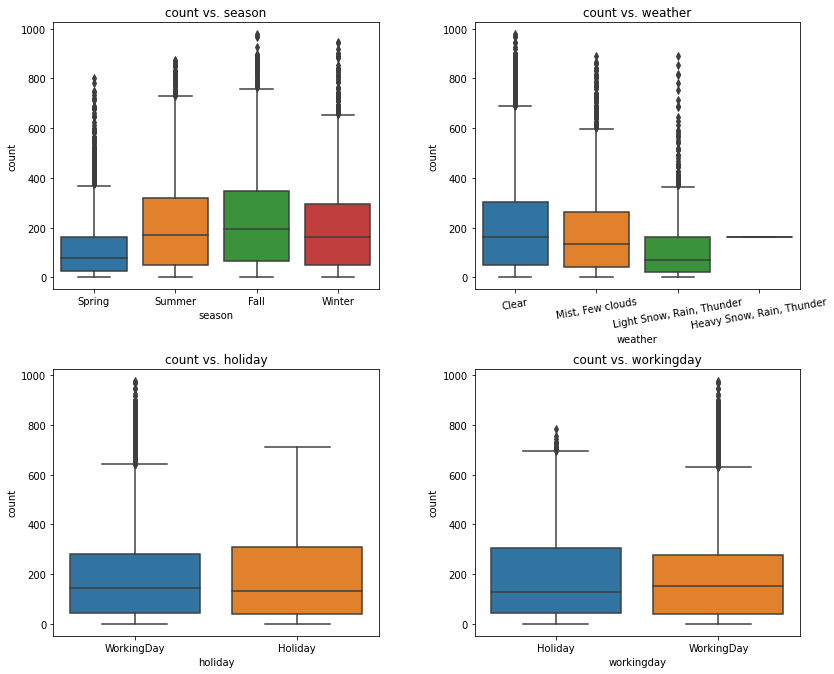

In [ ]:
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(12, 10)

sns.boxplot(x = 'season', y = 'count', data = DF, ax = axes[0, 0])
sns.boxplot(x = 'weather', y = 'count', data = DF, ax = axes[0, 1])
sns.boxplot(x = 'holiday', y = 'count', data = DF, ax = axes[1, 0])
sns.boxplot(x = 'workingday', y = 'count', data = DF, ax = axes[1, 1])

axes[0, 0].set(title='count vs. season')
axes[0, 1].set(title='count vs. weather')
axes[1, 0].set(title='count vs. holiday')
axes[1, 1].set(title='count vs. workingday')

axes[0, 1].tick_params(axis = 'x', labelrotation = 10)
plt.show()

* 선 그래프

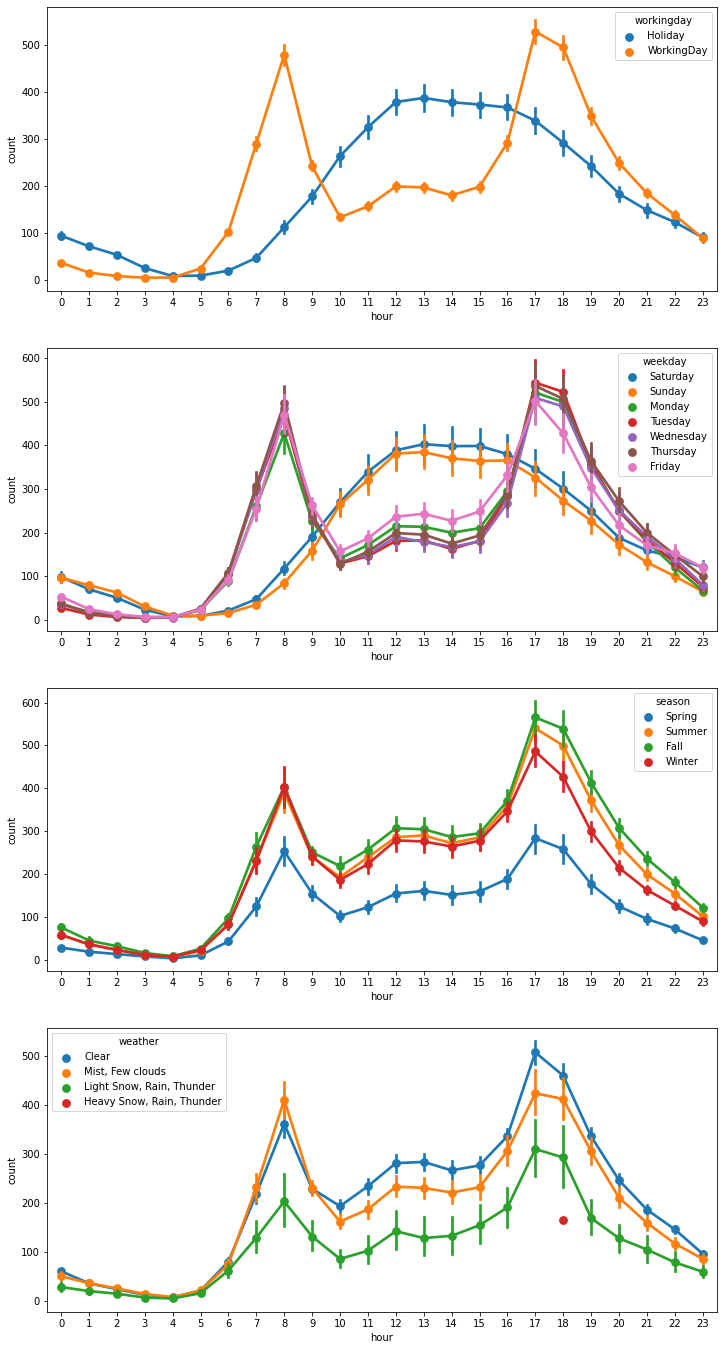

In [ ]:
figure, axes = plt.subplots(nrows = 4)
figure.set_size_inches(12, 24)

sns.pointplot(x = 'hour', y = 'count', data = DF, hue = 'workingday', ax = axes[0])
sns.pointplot(x = 'hour', y = 'count', data = DF, hue = 'weekday', ax = axes[1])
sns.pointplot(x = 'hour', y = 'count', data = DF, hue = 'season', ax = axes[2])
sns.pointplot(x = 'hour', y = 'count', data = DF, hue = 'weather', ax = axes[3])
plt.show()

* 산점도

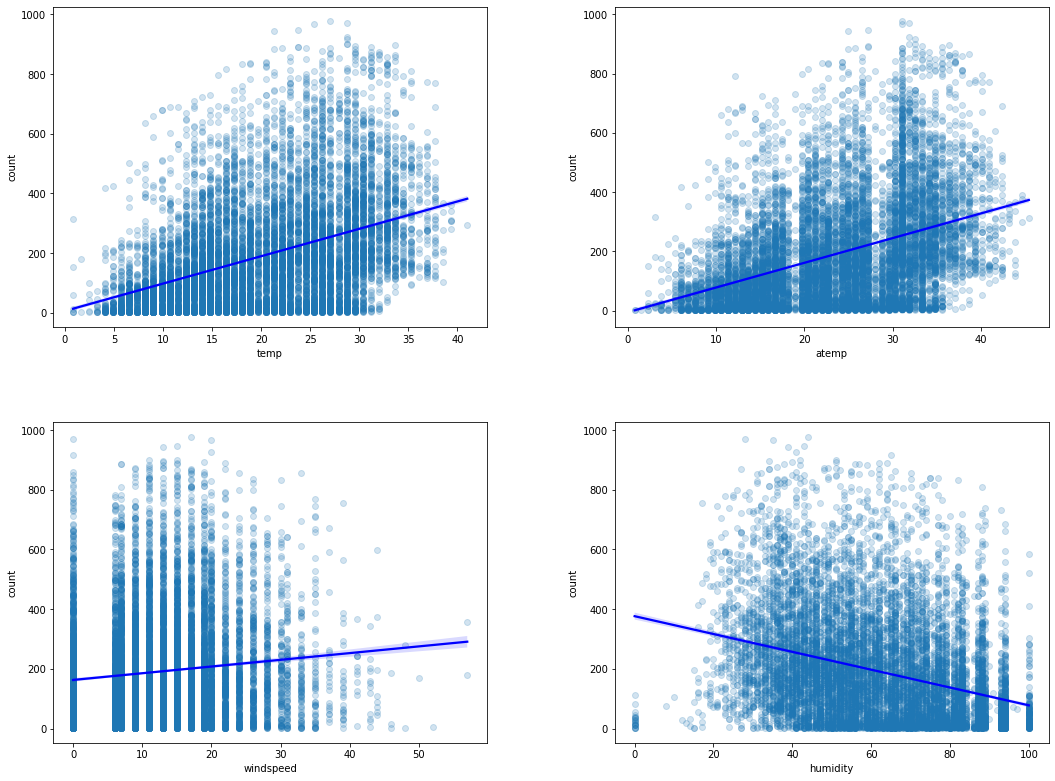

In [ ]:
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(16, 12)

sns.regplot(x = 'temp', y = 'count', data = DF, ax = axes[0, 0], 
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(x = 'atemp', y = 'count', data = DF, ax = axes[0, 1], 
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(x = 'windspeed', y = 'count', data = DF, ax = axes[1, 0], 
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(x = 'humidity', y = 'count', data = DF, ax = axes[1, 1], 
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
plt.show()

> ## 2) HeatMap - 연속형 데이터

* 연속형 데이터 상관계수('r')

In [ ]:
DF[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


* HeatMap Visualization

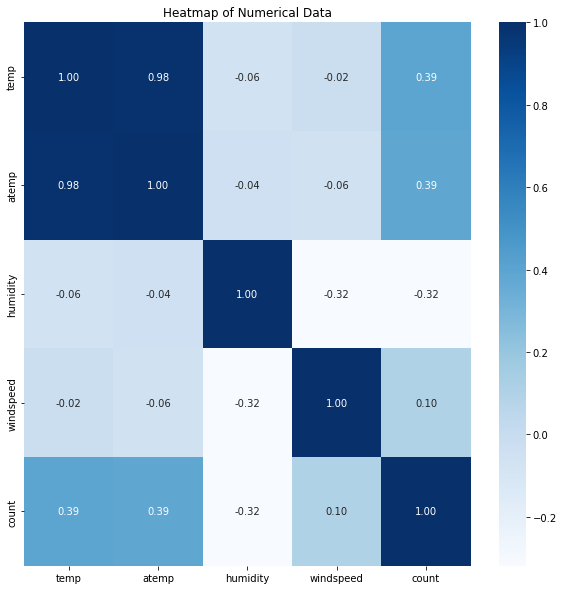

In [ ]:
heatMap = DF[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() 
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)

sns.heatmap(heatMap,
            annot = True,
            cmap = 'Blues',
            fmt = '.2f')

ax.set(title='Heatmap of Numerical Data');

# IV. Log Transformation

> ## 1) 로그 변환 전 DataFrame

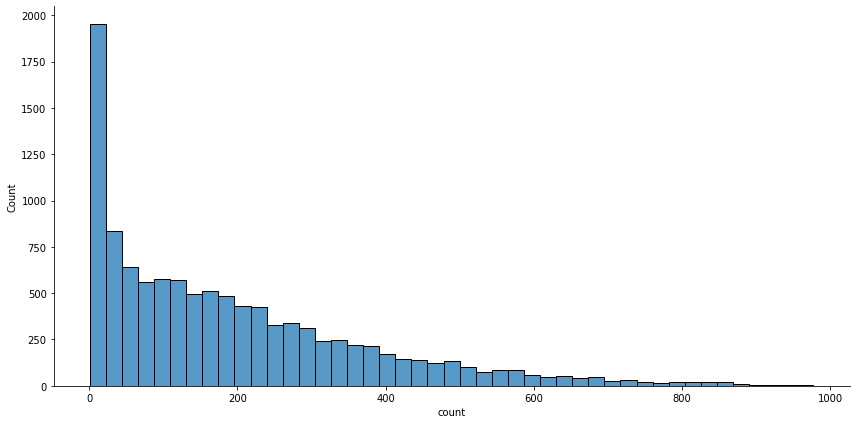

In [ ]:
sns.displot(DF['count'], height = 6, aspect = 2)
plt.show()

### (1) 변수 선택 - 'casual', 'registered' 제외

* X : 'month', 'day', 'hour', 'season', 'workingday', 'weather', 'atemp'
* y : 'count'

In [ ]:
DF1 = DF0[['month', 'day', 'hour', 'weekday', 'season', 'workingday', 'weather', 'atemp', 'count']].copy()

DF1.head(3)

,month,day,hour,weekday,season,workingday,weather,atemp,count
0,1,1,0,5,1,0,1,14.395,16
1,1,1,1,5,1,0,1,13.635,40
2,1,1,2,5,1,0,1,13.635,32


### (2) train_test_split( )

* 7 : 3
 - random_state = 2045

In [ ]:
from sklearn.model_selection import train_test_split

X = DF1[['month', 'day', 'hour', 'weekday', 'season', 'workingday', 'weather', 'atemp']]
y = DF1['count']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7620, 8) (7620,)
Test Data :  (3266, 8) (3266,)


> ## 2) 로그 변환 후 DataFrame

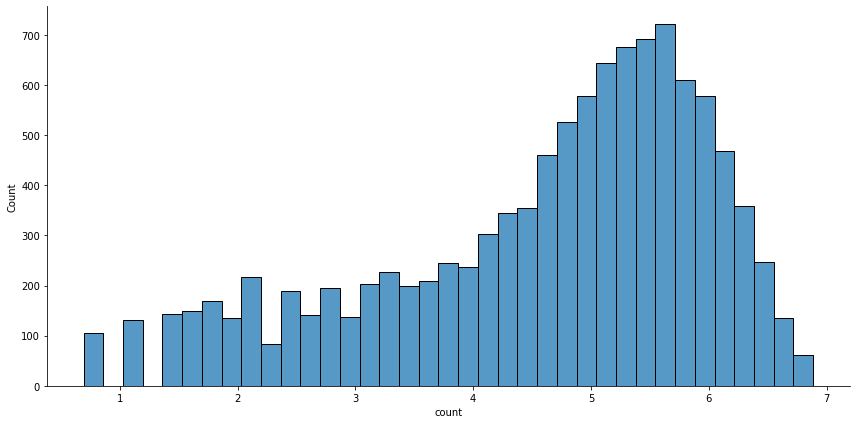

In [ ]:
sns.displot(np.log1p(DF['count']), height = 6, aspect = 2)
plt.show()

### (1) 'count' 로그 변환

In [ ]:
DF2 = DF0[['month', 'day', 'hour', 'weekday', 'season', 'workingday', 'weather', 'atemp', 'count']].copy()

DF2.head(3)

,month,day,hour,weekday,season,workingday,weather,atemp,count
0,1,1,0,5,1,0,1,14.395,16
1,1,1,1,5,1,0,1,13.635,40
2,1,1,2,5,1,0,1,13.635,32


* np.log1p( )

In [ ]:
DF2['count'] = np.log1p(DF2['count'])

In [ ]:
DF2.head(3)

,month,day,hour,weekday,season,workingday,weather,atemp,count
0,1,1,0,5,1,0,1,14.395,2.833213
1,1,1,1,5,1,0,1,13.635,3.713572
2,1,1,2,5,1,0,1,13.635,3.496508


### (2) train_test_split( )

* 7 : 3
 - random_state = 2045

In [ ]:
from sklearn.model_selection import train_test_split

X = DF2[['month', 'day', 'hour', 'weekday', 'season', 'workingday', 'weather', 'atemp']]
y = DF2['count']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y,
                                                                    test_size = 0.3,
                                                                    random_state = 2045)
print('Train Data : ', X_train_log.shape, y_train_log.shape)
print('Test Data : ', X_test_log.shape, y_test_log.shape)

Train Data :  (7620, 8) (7620,)
Test Data :  (3266, 8) (3266,)


# V. Modeling - DecisionTreeRegressor

> ## 1) 모델 생성

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state= 2045)
model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)

> ## 2) 모델 평가

In [ ]:
from sklearn.metrics import r2_score
print('r2 :',r2_score(y_test, pred_dt))

r2 : 0.7415173161042725


> ## 3) Feature Importances

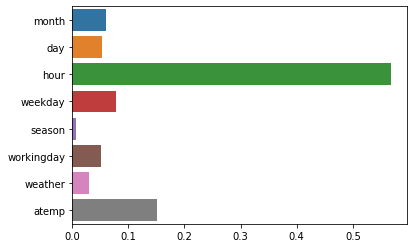

In [ ]:
sns.barplot(x= model_dt.feature_importances_,
            y= X_train.columns)
plt.show()

> ## 1) 모델 생성 - LogTransformation

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt_l = DecisionTreeRegressor(random_state= 2045)
model_dt_l.fit(X_train_log, y_train_log)
pred_dt_l = model_dt_l.predict(X_test_log)

> ## 2) 모델 평가 - LogTransformation

In [ ]:
from sklearn.metrics import r2_score
print('r2 :',r2_score(y_test_log, pred_dt_l))

r2 : 0.8500521257748428


> ## 3) Feature Importances

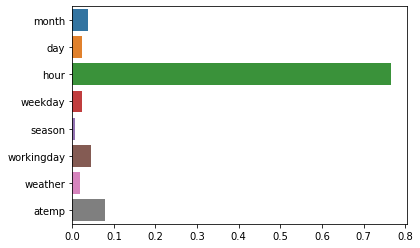

In [ ]:
sns.barplot(x= model_dt_l.feature_importances_,
            y= X_train_log.columns)
plt.show()

# VI. Modeling - RandomForestRegressor

> ## 1) 모델 생성

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state= 2045)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

> ## 2) 모델 평가

In [ ]:
from sklearn.metrics import r2_score
print('r2 :',r2_score(y_test, pred_rf))

r2 : 0.8579583426244725


> ## 3) Feature Importances

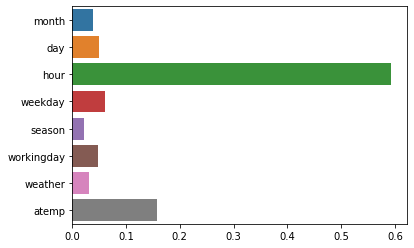

In [ ]:
sns.barplot(x= model_rf.feature_importances_,
            y= X_train.columns)
plt.show()

> ## 1) 모델 생성 - LogTransformation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf_l = RandomForestRegressor(random_state= 2045)
model_rf_l.fit(X_train_log, y_train_log)
pred_rf_l = model_rf_l.predict(X_test_log)

> ## 2) 모델 평가 - LogTransformation

In [ ]:
from sklearn.metrics import r2_score
print('r2 :',r2_score(y_test_log, pred_rf_l))

r2 : 0.921089587079552


> ## 3) Feature Importances

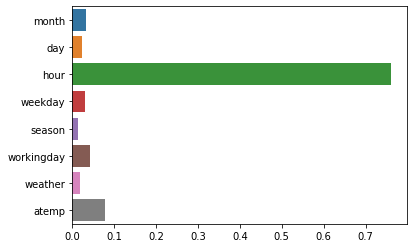

In [ ]:
sns.barplot(x= model_rf_l.feature_importances_,
            y= X_train_log.columns)
plt.show()

# VII. Modeling - Adaptive Boosting

> ## 1) 모델 생성

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model_ada = AdaBoostRegressor(random_state= 2045)
model_ada.fit(X_train, y_train)
pred_ada = model_ada.predict(X_test)

> ## 2) 모델 평가

In [ ]:
from sklearn.metrics import r2_score
print('r2 :',r2_score(y_test, pred_ada))

r2 : 0.6016010947179995


> ## 3) Feature Importances

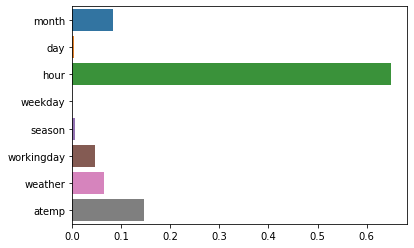

In [ ]:
sns.barplot(x= model_ada.feature_importances_,
            y= X_train.columns)
plt.show()

> ## 1) 모델 생성 - LogTransformation

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model_ada_l = AdaBoostRegressor(random_state= 2045)
model_ada_l.fit(X_train_log, y_train_log)
pred_ada_l = model_ada_l.predict(X_test_log)

> ## 2) 모델 평가 - LogTransformation

In [ ]:
from sklearn.metrics import r2_score
print('r2 :',r2_score(y_test_log, pred_ada_l))

r2 : 0.7474458965556088


> ## 3) Feature Importances

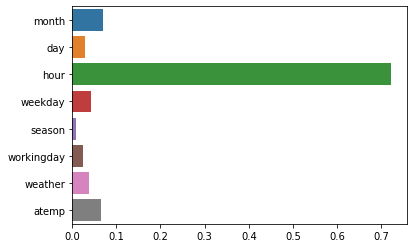

In [ ]:
sns.barplot(x= model_ada_l.feature_importances_,
            y= X_train_log.columns)
plt.show()

# VIII. Modeling - Gradient Boosting Machine (GBM)

> ## 1) 모델 생성

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbm = GradientBoostingRegressor(random_state= 2045)
model_gbm.fit(X_train, y_train)
pred_gbm = model_gbm.predict(X_test)

> ## 2) 모델 평가

In [ ]:
from sklearn.metrics import r2_score
print('r2 :',r2_score(y_test, pred_gbm))

r2 : 0.8009795372087174


> ## 3) Feature Importances

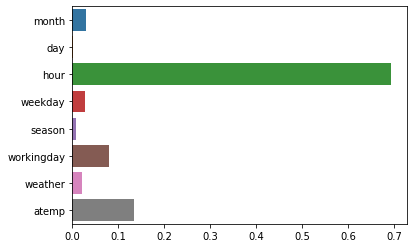

In [ ]:
sns.barplot(x= model_gbm.feature_importances_,
            y= X_train.columns)
plt.show()

> ## 1) 모델 생성 - LogTransformation

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbm_l = GradientBoostingRegressor(random_state= 2045)
model_gbm_l.fit(X_train_log, y_train_log)
pred_gbm_l = model_ada_l.predict(X_test_log)

> ## 2) 모델 평가 - LogTransformation

In [ ]:
from sklearn.metrics import r2_score
print('r2 :',r2_score(y_test_log, pred_gbm_l))

r2 : 0.7474458965556088


> ## 3) Feature Importances

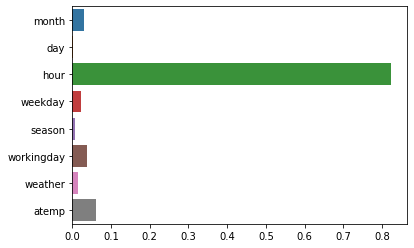

In [ ]:
sns.barplot(x= model_gbm_l.feature_importances_,
            y= X_train_log.columns)
plt.show()

# IX. Modeling - LightGBM

> ## 1) 모델 생성

In [ ]:
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor(random_state= 2045)
model_lgbm.fit(X_train, y_train)
pred_lgbm = model_lgbm.predict(X_test)

> ## 2) 모델 평가

In [ ]:
from sklearn.metrics import r2_score
print('r2 :',r2_score(y_test, pred_lgbm))

r2 : 0.8726475906484834


> ## 3) Feature Importances

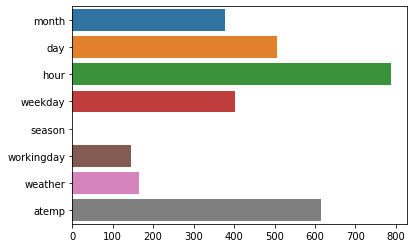

In [ ]:
sns.barplot(x= model_lgbm.feature_importances_,
            y= X_train.columns)
plt.show()

> ## 1) 모델 생성 - LogTransformation

In [ ]:
from lightgbm import LGBMRegressor
model_lgbm_l = LGBMRegressor(random_state= 2045)
model_lgbm_l.fit(X_train_log, y_train_log)
pred_lgbm_l = model_lgbm_l.predict(X_test_log)

> ## 2) 모델 평가 - LogTransformation

In [ ]:
from sklearn.metrics import r2_score
print('r2 :',r2_score(y_test_log, pred_lgbm_l))

r2 : 0.9345986203241008


> ## 3) Feature Importances

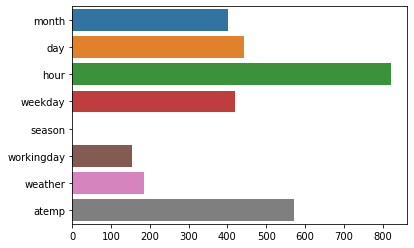

In [ ]:
sns.barplot(x= model_lgbm_l.feature_importances_,
            y= X_train_log.columns)
plt.show()

# X. Modeling - eXtra Gradient Boost (XGBoost)

> ## 1) 모델 생성

In [ ]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(random_state= 2045)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

> ## 2) 모델 평가

In [ ]:
from sklearn.metrics import r2_score
print('r2 :',r2_score(y_test, pred_xgb))

r2 : 0.9010167957766231


> ## 3) Feature Importances

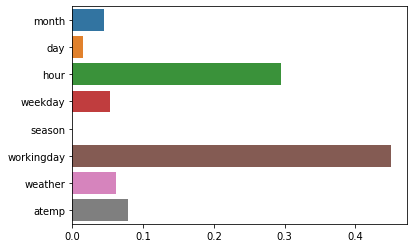

In [ ]:
sns.barplot(x= model_xgb.feature_importances_,
            y= X_train.columns)
plt.show()

> ## 1) 모델 생성 - LogTransformation

In [ ]:
from xgboost import XGBRegressor
model_xgb_l = XGBRegressor(random_state= 2045)
model_xgb_l.fit(X_train_log, y_train_log)
pred_xgb_l = model_xgb_l.predict(X_test_log)

> ## 2) 모델 평가 - LogTransformation

In [ ]:
from sklearn.metrics import r2_score
print('r2 :',r2_score(y_test_log, pred_xgb_l))

r2 : 0.9472174599890173


> ## 3) Feature Importances

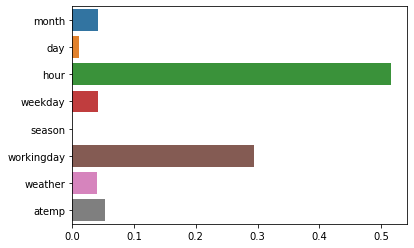

In [ ]:
sns.barplot(x= model_xgb_l.feature_importances_,
            y= X_train_log.columns)
plt.show()

# XI. Modeling - K-Nearest Neighbors (K-NN)

> ## 1) 모델 생성

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors= 7)
model_knn.fit(X_train, y_train)
pred_knn = model_knn.predict(X_test)

> ## 2) 모델 평가

In [ ]:
from sklearn.metrics import r2_score
print('r2 :',r2_score(y_test, pred_knn))

r2 : 0.7531464331332556


> ## 1) 모델 생성 - LogTransformation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_knn_l = KNeighborsRegressor(n_neighbors= 7)
model_knn_l.fit(X_train_log, y_train_log)
pred_knn_l = model_knn_l.predict(X_test_log)

> ## 2) 모델 평가 - LogTransformation

In [ ]:
from sklearn.metrics import r2_score
print('r2 :',r2_score(y_test_log, pred_knn_l))

r2 : 0.8542655259857205


# 
# 
# 
# The End
# 
# 
# 